
# Mean-field theory of spontaneous magnetization 


In the framework of mean-field theory, the value of *spontaneous magnetization* of ferromagnetic material 
is determined by the solution of the following *self-consistency equation*: 


$$m = \tanh\left(\frac{m}{\tau}\right). \qquad\qquad\qquad(A)$$


Here $$\tau = \frac{T}{T_c},\qquad\qquad\qquad\qquad\ $$ 
$T$ is the temperature, and $T_c$ the characteristic parameter 
of a ferromagnet which is determined by the geometry of crystall 
latice and the strength of the spin-spin interaction.

For the derivation of Eq. (A) see the class notes at <https://www.phys.uconn.edu/~rozman/Courses/P2200_25F/downloads/mean-field-theory.pdf>


### Graphical solution of self-consistency equation


Let's investigate the solution of Equation (A). We rewrite the equation in the following form:


$$\tau u = \tanh\left(u\right), \qquad\qquad\qquad(B)$$


where we introduced new independent variable $u = \frac{m}{\tau}$. 


Let's plot the left and right hands sides of Eq. (B) as functions of $u$ for several values of $\tau$.

In [1]:

using PyPlot
using Roots

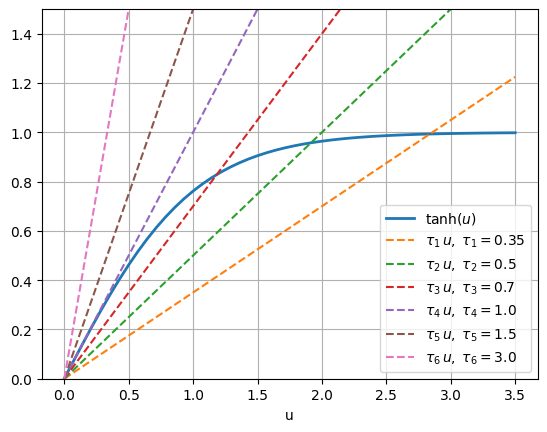

In [2]:

# pygui(true)
taus = [0.35, 0.5, 0.7, 1.0, 1.5, 3.0]
ng = length(taus)
us = range(0.0, 3.5, 50)

plot(us, tanh.(us), label=L"\tanh(u)", linewidth=2)
for i = 1:ng
    tau = taus[i]
    plot(us, tau .* us, label=L"\tau_{%$i}\,u, \; \tau_{%$i} = %$tau", linestyle="dashed")
end
ylim(0.0, 1.5)
xlabel("u")
grid(true)
legend();


We see that if $\tau > 1$, the graphs of the left and right hands sides of Eq. (B) do not cross (except for trivial solution $u=0$). 
That means that Eqs. (A) and (B) have only the trivial solution $u = 0$, $m = 0$ if $T > T_c$.  

For temperatures below $T_C$, the graphs of the left and right hands sides of Eq. (B) do intersect at $u(T) \not= 0$. 
That means that the system is spontaneously magnetized when $T < T_c$.


### Numerical determination of magnetization m(T)


Let's solve numerically Eq. (A) for spontaneous magnetization.

In [3]:

selfconsistency(m, tau) = m - tanh(m/tau)    # m is the independent variable, tau is a parameter

selfconsistency (generic function with 1 method)


Let's solve for $\tau_{\mathrm{min}} \le \tau \le \tau_{\mathrm{max}}$.

In [4]:

taumin = 0.2
taumax = 1.0
np = 201;


Pre-allocate storage:

In [5]:

tau = range(taumin, taumax, np)
mag = zeros(np);


Find spontaneous magnetization vs temperature

In [6]:

for i = 1:np-1
    mag[i] = find_zero(selfconsistency, (0.001, 1.0), tau[i]) # use bisection
end


Plot spontaneous magnetization:

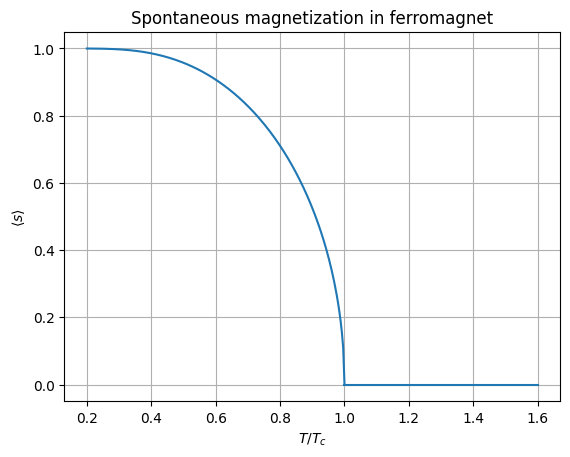

In [7]:

plot(tau, mag)
plot([1.0, 1.6], [0.0, 0.0], color="#1f77b4") # zero magnetization for tau >= 1, i.e. for T > T_c
grid(true)
xlabel(L"T/T_c")
ylabel(L"\langle s \rangle")
title("Spontaneous magnetization in ferromagnet");


### Critical exponent


Let's look the the magnetization $m(T)$ in the close vicinity of the phase transition.

In [8]:

ind = 190:np-1;


The variable that describes $T - T_c$:

In [9]:

q = 1.0 .- tau;

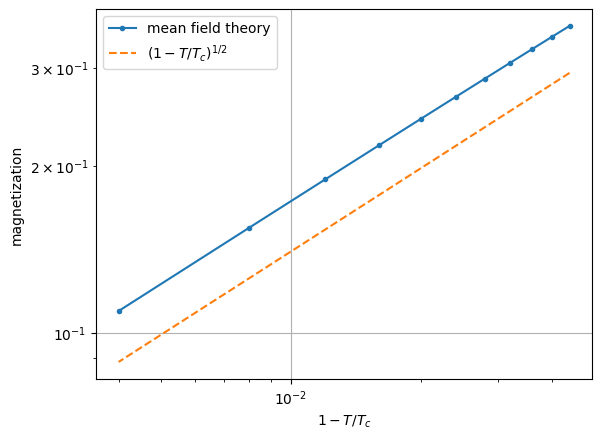

In [10]:

loglog(q[ind], mag[ind], marker=".", label="mean field theory")
loglog(q[ind], 1.4*(q[ind]).^0.5, linestyle="dashed", label=L"(1 - T/T_c)^{1/2}")
xlabel(L"1 - T/T_c")
ylabel("magnetization")
grid(true)
legend();

That is, for $T < T_c$,

$$m(T)  \sim \left(1 - \frac{T}{T_c}\right)^{\frac{1}{2}} .$$

This power dependence is belived to be universal. The exponent $\frac{1}{2}$ is called *critical exponent*.